In [141]:
# amount of satellites we see

[]

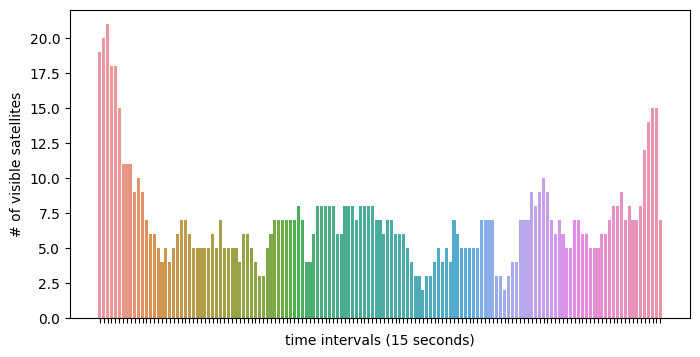

In [142]:
cnx = sqlite3.connect("../idp-castellotti-data/satellites.sqlite")
df = pd.read_sql("select * from satellites", cnx)
df = df[:1000]
df["timestamp"] = pd.to_datetime(df["ts"], unit="s")
plt.figure(figsize=(8, 4))

sns.countplot(df, x="relative_ts", dodge=False)
plt.xlabel("time intervals (15 seconds)")
plt.ylabel("# of visible satellites")
# plt.title('count of visible satellites in 15 seconds intervals')
plt.gca().axes.xaxis.set_ticklabels([])
plt.savefig("tex/tumbeamer/pics/count_visible_satellites.png")
plt.plot()

In [143]:
# correlating satellite handovers and bw

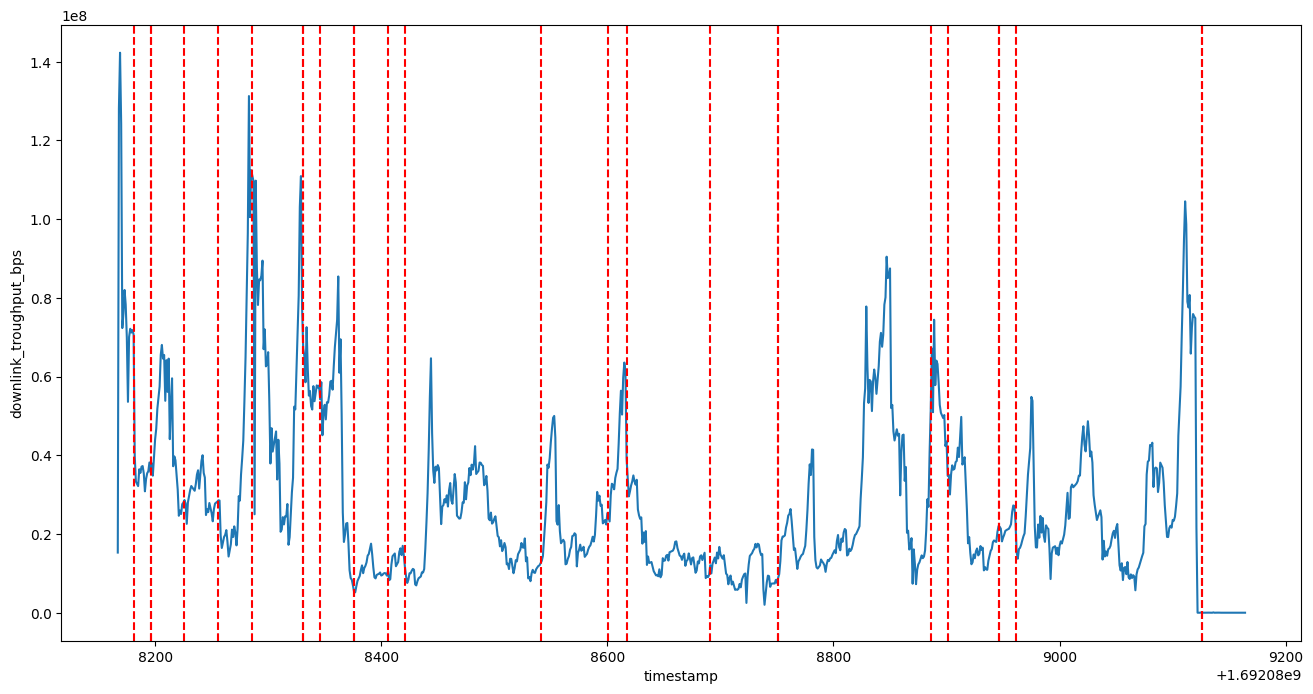

In [144]:
handover_unix_timestamps = []
directory_path = "../idp-castellotti-data/map-bw-stuff4"
for previous_file, current_file, next_file in get_adjacent_files(directory_path):
    if previous_file is not None:
        detect_handovers(
            os.path.join(directory_path, previous_file),
            os.path.join(directory_path, current_file),
            handover_unix_timestamps,
        )
    else:
        detect_handovers(
            os.path.join(directory_path, current_file),
            os.path.join(directory_path, next_file),
            handover_unix_timestamps,
        )


df = pd.read_csv("../idp-castellotti-data/map-bw-stuff4.csv")
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x="timestamp", y="downlink_troughput_bps", dashes=True)


for timestamp in handover_unix_timestamps:
    plt.axvline(x=timestamp, color="r", linestyle="--")

In [145]:
# now we want to assess whether the dish buffers packets relayed to satellites, our intuition is that if this is the case we will see a decrease in RTT if we start creating some traffic with a tool like iperf3 on the very same interface

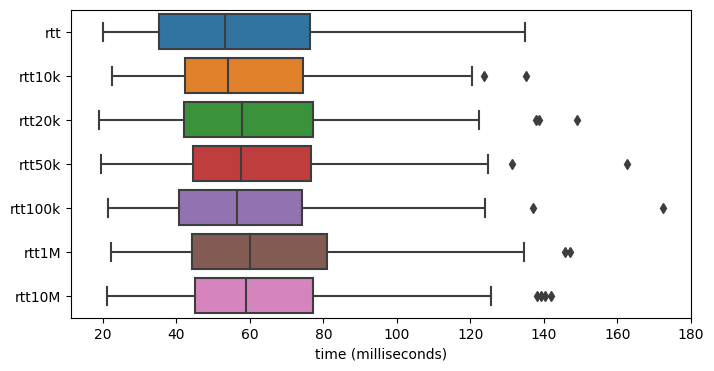

In [146]:
df0 = pd.read_csv("../idp-castellotti-data/ping-bw-normal.csv")
df1 = pd.read_csv("../idp-castellotti-data/ping-bw-10k.csv")
df2 = pd.read_csv("../idp-castellotti-data/ping-bw-20k.csv")
df3 = pd.read_csv("../idp-castellotti-data/ping-bw-50k.csv")
df4 = pd.read_csv("../idp-castellotti-data/ping-bw-100k.csv")
df5 = pd.read_csv("../idp-castellotti-data/ping-bw-1M.csv")
df6 = pd.read_csv("../idp-castellotti-data/ping-bw-10M.csv")
df = pd.concat([df0, df1, df2, df3, df4, df5, df6], axis=1).reindex(df1.index)
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df[
        [
            "rtt",
            # "pop_ping_latency_ms",
            "rtt10k",
            # "pop_ping_latency_ms10k",
            "rtt20k",
            # "pop_ping_latency_ms20k",
            "rtt50k",
            # "pop_ping_latency_ms50k",
            "rtt100k",
            # "pop_ping_latency_ms100k",
            "rtt1M",
            # "pop_ping_latency_ms1M",
            "rtt10M",
            # "pop_ping_latency_ms10M",
        ]
    ],
    orient="h",
)
# plt.savefig("tex/tumbeamer/pics/rtt-iperf-stress.png")
plt.xlabel("time (milliseconds)")
plt.show()

In [147]:
# visualizing a single obstruction map

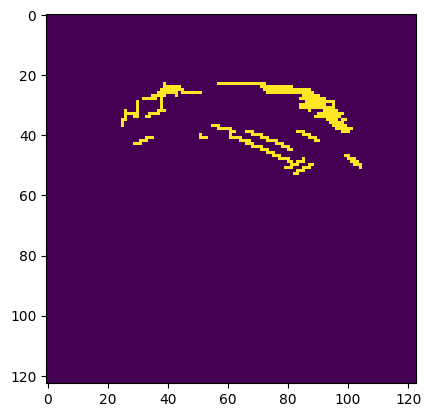

In [148]:
f = "../idp-castellotti-data/map-bw-stuff4/1692089163.json"
map = json.load(open(f))
map = map["dishGetObstructionMap"]["snr"]
map = np.array(map).reshape(123, 123)
plt.imshow(map)
plt.show()

In [149]:
# are we seeing some patterns in bandwidth?

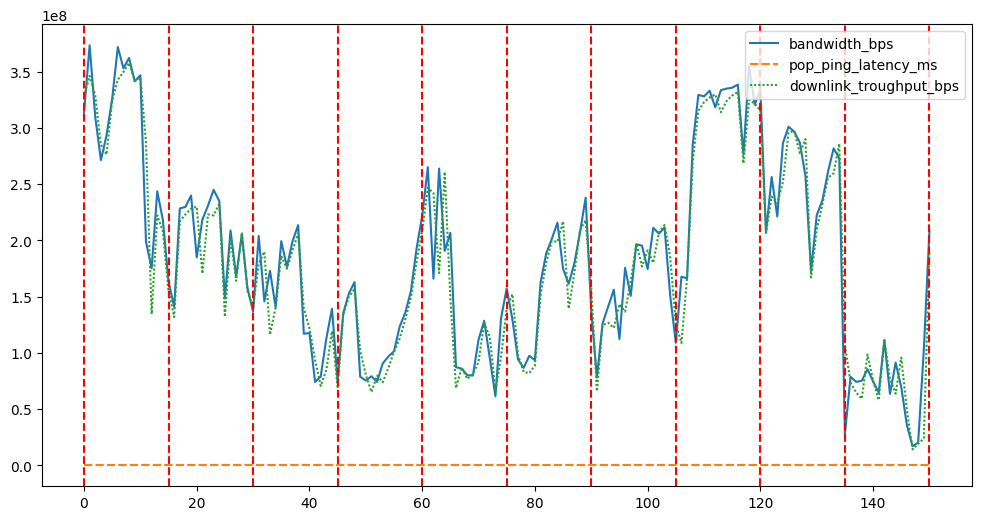

In [150]:

df = pd.read_csv("../idp-castellotti-data/large_file_download_5parallel.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S.%f")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[0:151], dashes=True)
for i in range(0, 151, 15):
    plt.axvline(i, color="red", linestyle="--")
plt.legend(loc='upper right')
plt.show()

In [ ]:
# repeating the same experiment (multiple intervals) while also downloading some debian ISOs

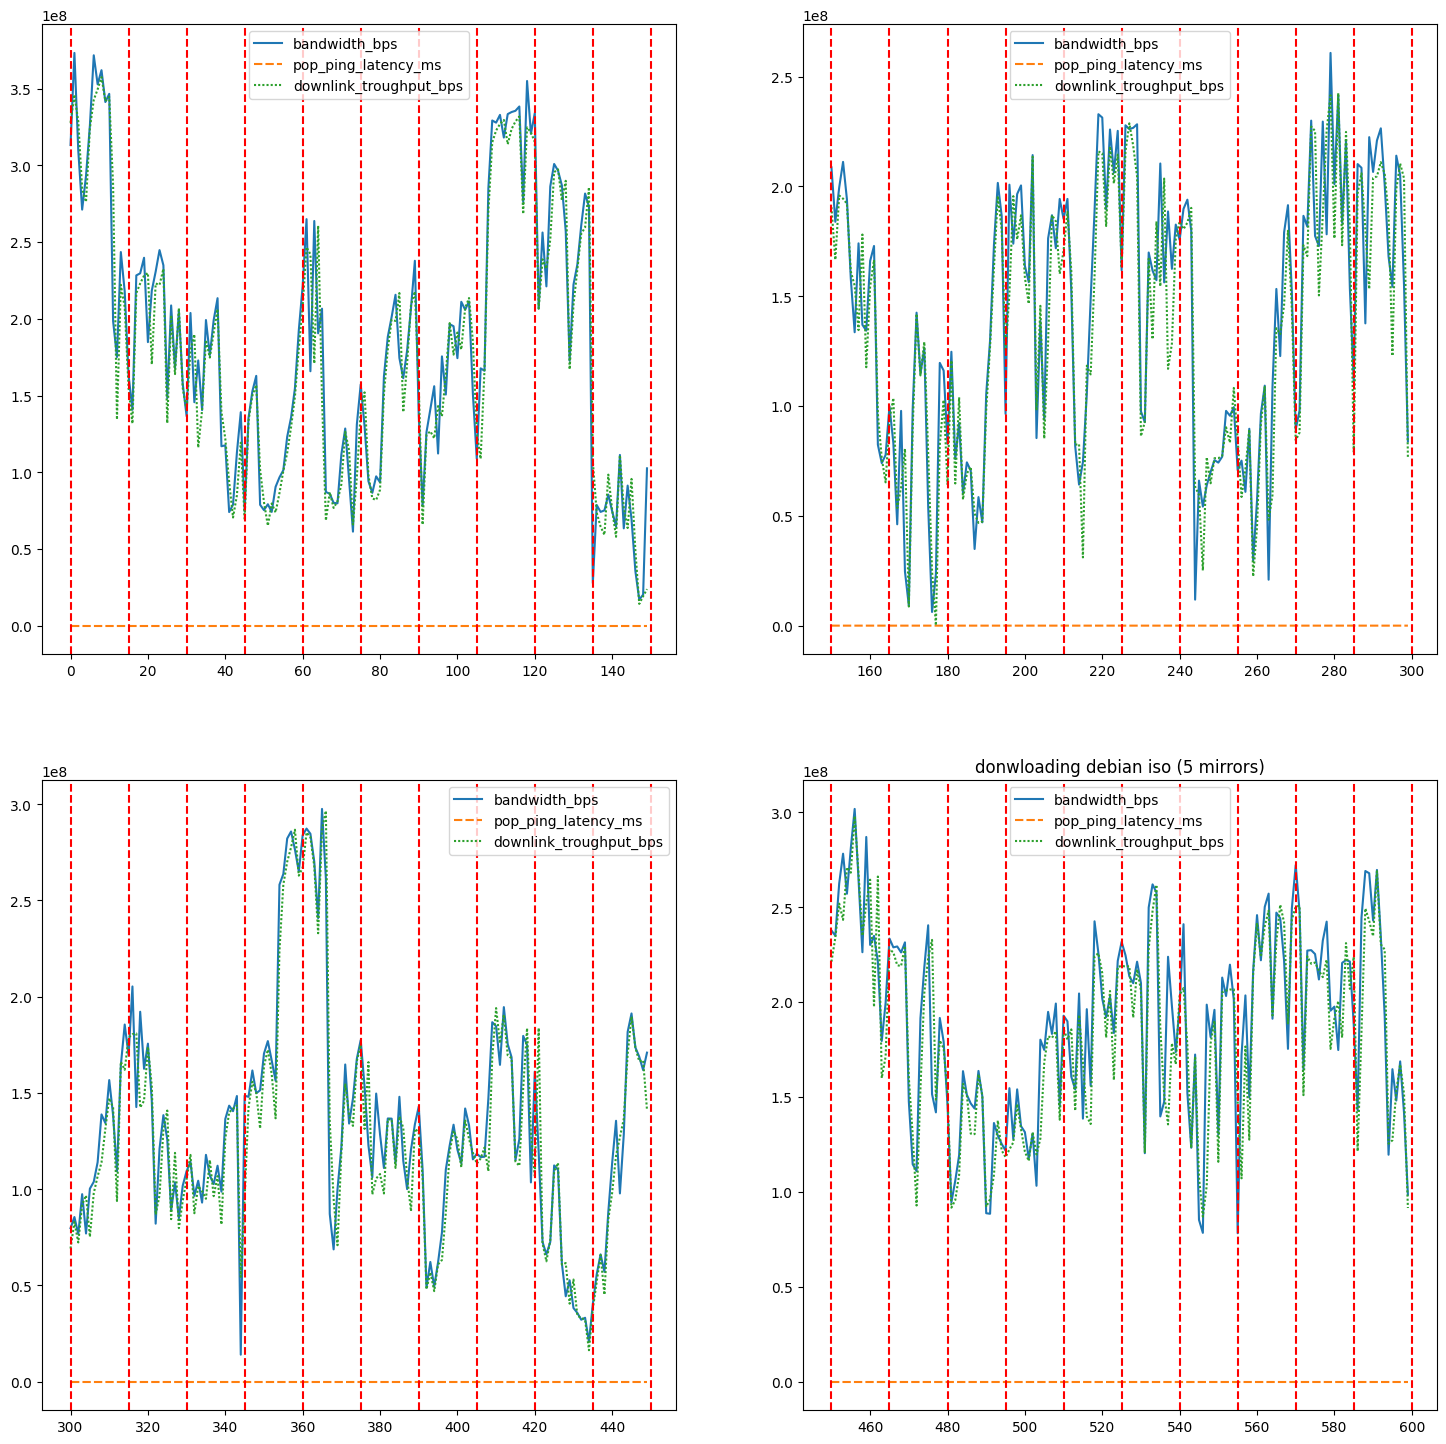

In [151]:

df = pd.read_csv("../idp-castellotti-data/large_file_download_5parallel.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S.%f")

fig, axes = plt.subplots(2, 2, figsize=(18, 18))
plt.title("donwloading debian iso (5 mirrors)")

plot = sns.lineplot(data=df[0:150], dashes=True,ax=axes[0, 0])
for i in range(0, 151, 15):
    plot.axvline(i, color="red", linestyle="--")

ax = sns.lineplot(data=df[150:300], dashes=True, ax=axes[0, 1])
for i in range(150, 301, 15):
    ax.axvline(i, color="red", linestyle="--")

ax = sns.lineplot(data=df[300:450], dashes=True, ax=axes[1, 0])
for i in range(300, 451, 15):
    ax.axvline(i, color="red", linestyle="--")

ax = sns.lineplot(data=df[450:600], dashes=True, ax=axes[1, 1])
for i in range(450, 601, 15):
    ax.axvline(i, color="red", linestyle="--")

# plt.show()

In [152]:
# patterns in satellite appeareances

[]

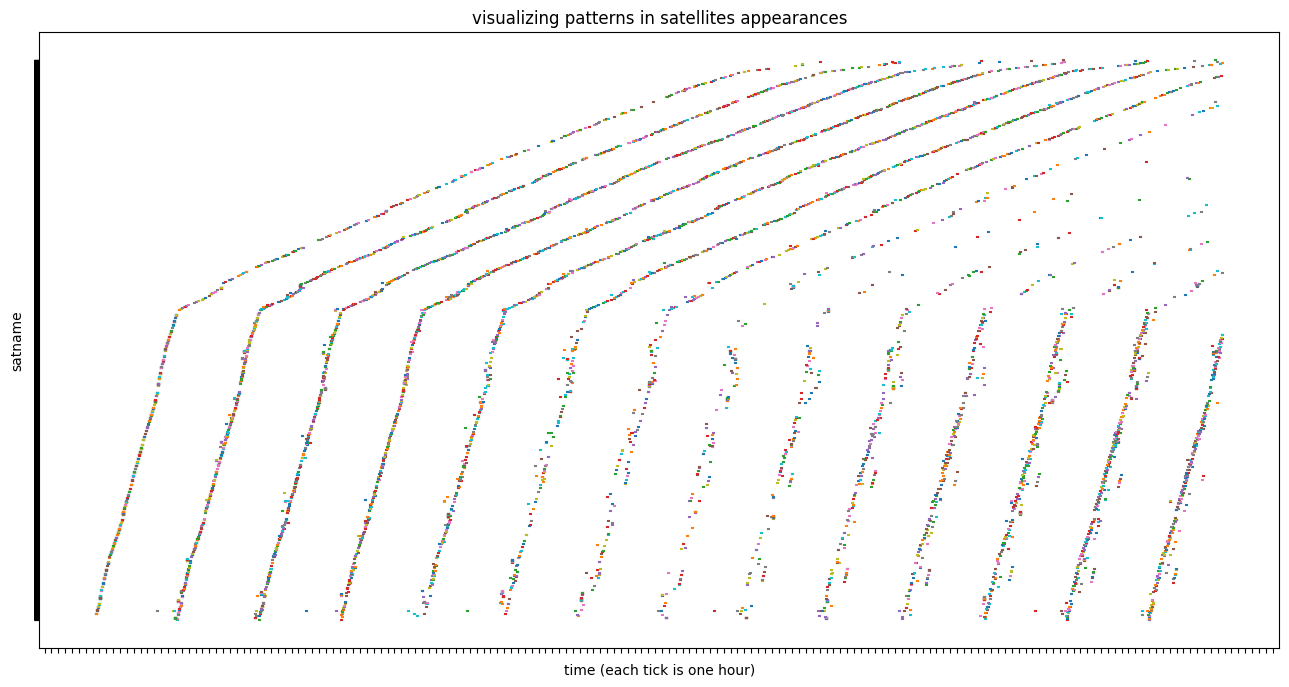

In [153]:
cnx = sqlite3.connect("../idp-castellotti-data/satellites.sqlite")
satellites = cnx.execute("SELECT * FROM satellites").fetchall()
sats = defaultdict(list)
for sat in satellites:
    sats[sat[3]].append([sat[1], round(sat[2]), sat[3]])

segments = defaultdict(list)
count = 0
for k in sats:
    if count == 10000:
        break
    count += 1
    for i in split_non_consequtive(sats[k]):
        segments[k].append(
            (datetime.fromtimestamp(i[0][1]), datetime.fromtimestamp(i[-1][1]))
        )

# how long we see satellites for
# for s in random.choices(satellites,k=20):
#     sat=s[3]
#     current_sat=segments[sat]
#     print(sat)
#     for s in current_sat:
#         print(s[1]-s[0])

# we need data in this format: https://stackoverflow.com/a/12291380
plt.figure(figsize=(16, 8))
for y in segments:
    for seg in segments[y]:
        plt.plot(seg, [y, y])
plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylabel("satname")
plt.xlabel("time (each tick is one hour)")
plt.title("visualizing patterns in satellites appearances")
plt.savefig("tex/tumthesis/img/visualizing-how-long-satellites-are-visible-for.png")
plt.plot()

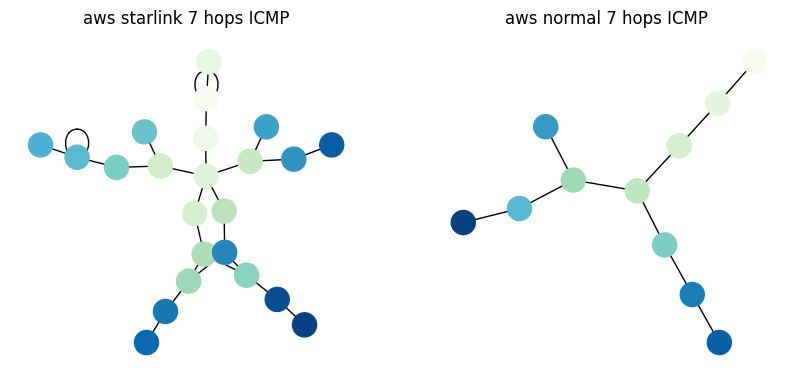

In [154]:
cloud_draw(provider="aws", hops=7, method="ICMP")

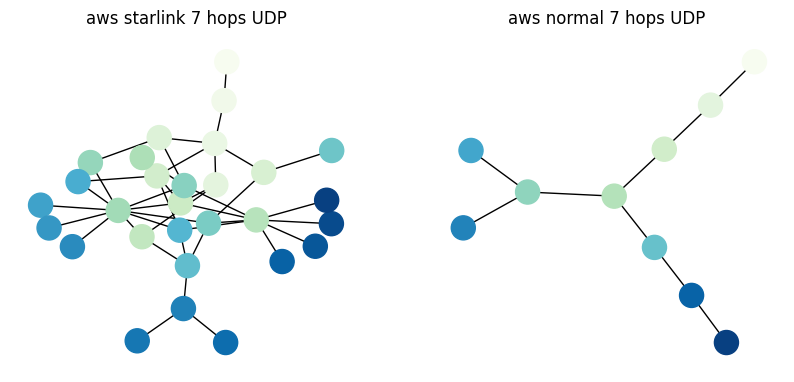

In [155]:
cloud_draw(provider="aws", hops=7, method="UDP")

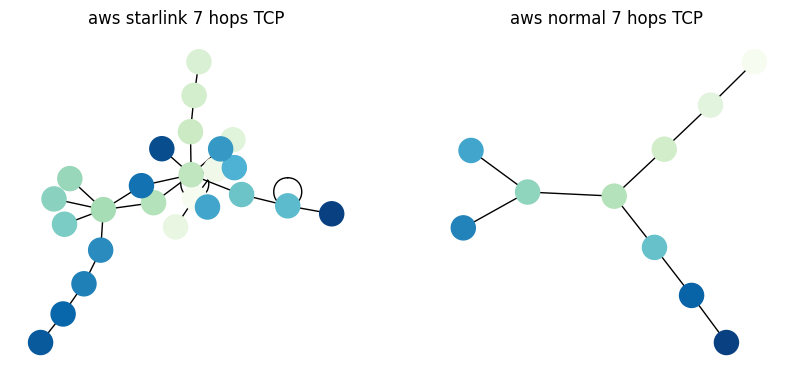

In [156]:
cloud_draw(provider="aws", hops=7, method="TCP")

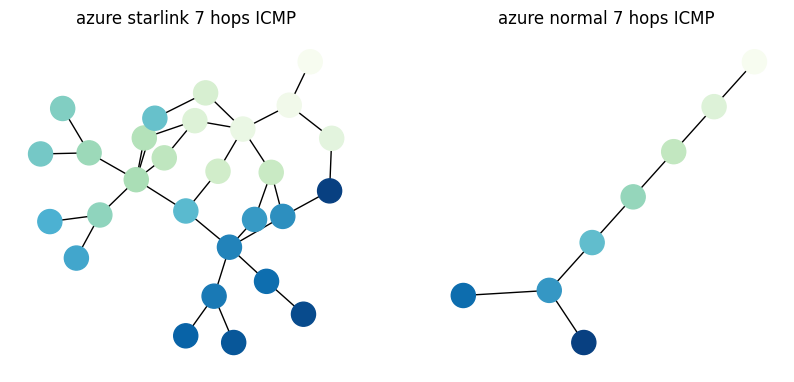

In [157]:
cloud_draw(provider="azure", hops=7, method="ICMP")